## 01. Import Libraries

In [50]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [52]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Import Data

In [27]:
# define Path:
path = r'/Users/piperdutcher/Documents/Achievement 6/02 Data/Prepared Data'

In [31]:
# import Data

df = pd.read_pickle(os.path.join(path, 'renovation_flags.pkl'))

## 03. Prepare/Explore Data

In [38]:
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,month,year,condition_definition,grade_def,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,Average,Average Grade,no
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,Average,Average Grade,yes
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,Average,"Low Quality, Meets Code",no
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,Very Good,Average Grade,no
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,Average,Just Above Average,no


In [42]:
# new dataframe without categorical variables (id, date, waterfront, view, condition, grade, zipcode, latitutude, longitude, month, year, condition_definition, grade_def, renovated)

df2 = df.drop(columns = ['id','date','waterfront', 'view', 'condition', 'grade','latitude','longitude','zipcode','month','year', 'condition_definition', 'grade_def', 'renovated'])

In [44]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503


In [54]:
df2.shape

(21597, 12)

Data has already been cleaned and checked for outliers, missing values, and duplicates. Will proceed with K-means analysis utilizing the elbow method.

The possible relationships to be examined:

sqft_living vs price

yr_built vs price

yr_built vs sqft_lot

## 04. K-means Unsupervised Machine Learning

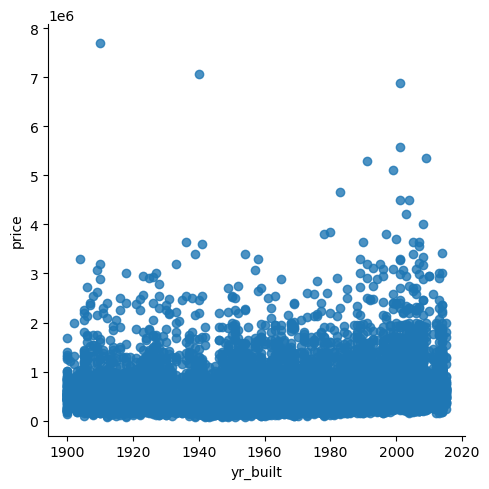

In [72]:
# start with the elbow method to determine the number of clusters:
# starting with yr_built vs price

sns.lmplot(x = 'yr_built', y ='price', data = df2)

In [108]:
# first define number of possible clusters (using 0-10 for ease)
#then define k-mean clusters within said range

clusters = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clusters]

In [106]:
#create a score that represents the rate of variation

score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2964111676846186.0,
 -1407309097484229.5,
 -782488146275784.0,
 -513222905456039.94,
 -376607030547602.56,
 -289946808954130.25,
 -231590484240402.78,
 -188213748960900.25,
 -162764408346669.25]

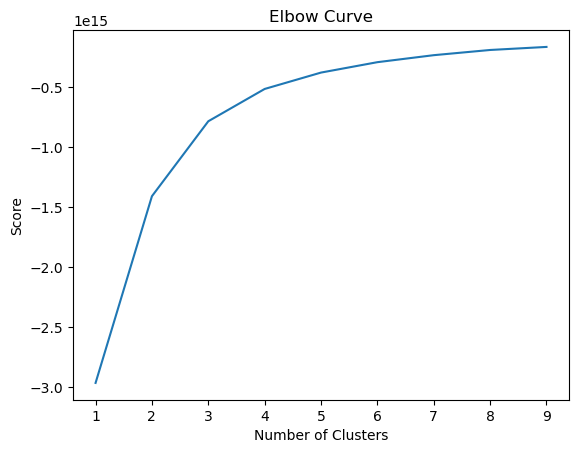

In [110]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It appears that either 4 or 5 clusters will be ideal for this analysis

In [128]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [130]:
# Fit the k-means object to the data.

kmeans.fit(df2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [132]:
df2['cluster'] = kmeans.fit_predict(df2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [134]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,cluster
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,2
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,2


In [136]:
df2['cluster'].value_counts()

cluster
2    12923
0     7257
3     1227
1      190
Name: count, dtype: int64

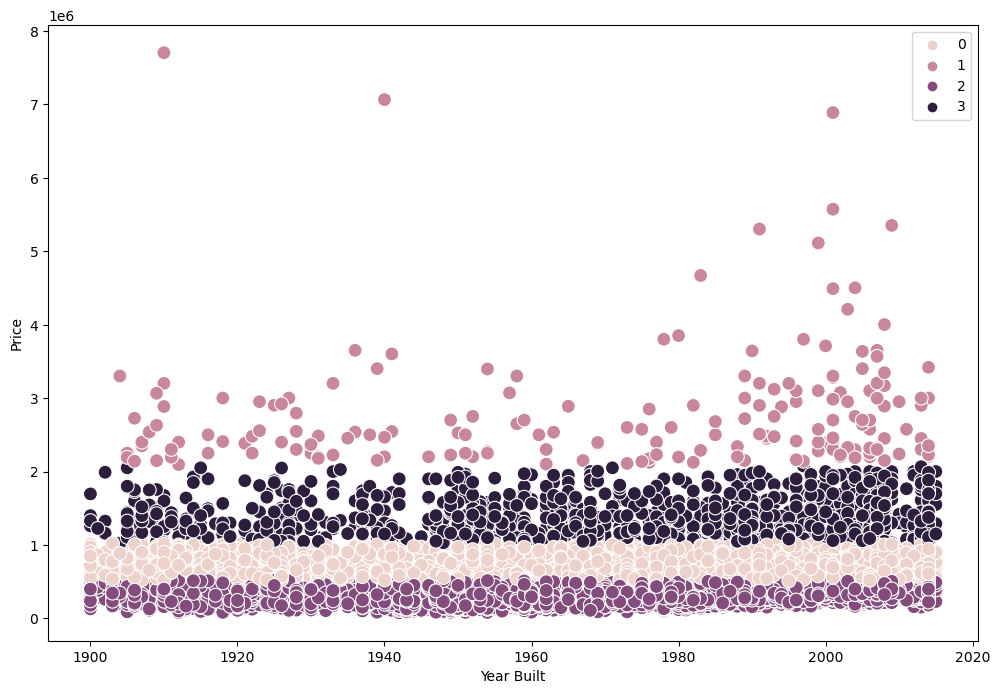

In [142]:
# Plot the clusters for the "Price" and "Yr_Built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['yr_built'], y=df2['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

In this we can see that the 4 clusters show that homes of all prices have been built in any range of years. Lets use the cluster to explore another relationsip.

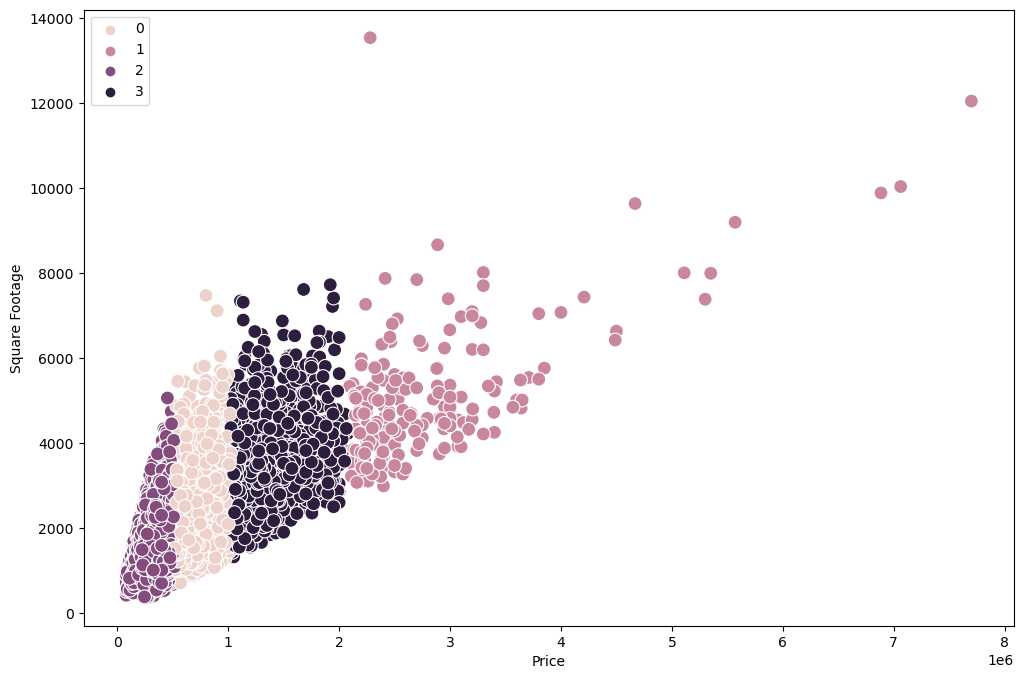

In [153]:
# Plot the clusters for the "Price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['price'], y=df2['sqft_living'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price')
plt.ylabel('Square Footage')
plt.show()

This plot shows that there is some relationship between price and square footage (more easily visualized than the simple regression model from the last assignment did). As there appear to be very specific price clusters, this is a relationship that could be explored further, perhaps with more clusters or with each price range being examined individually.

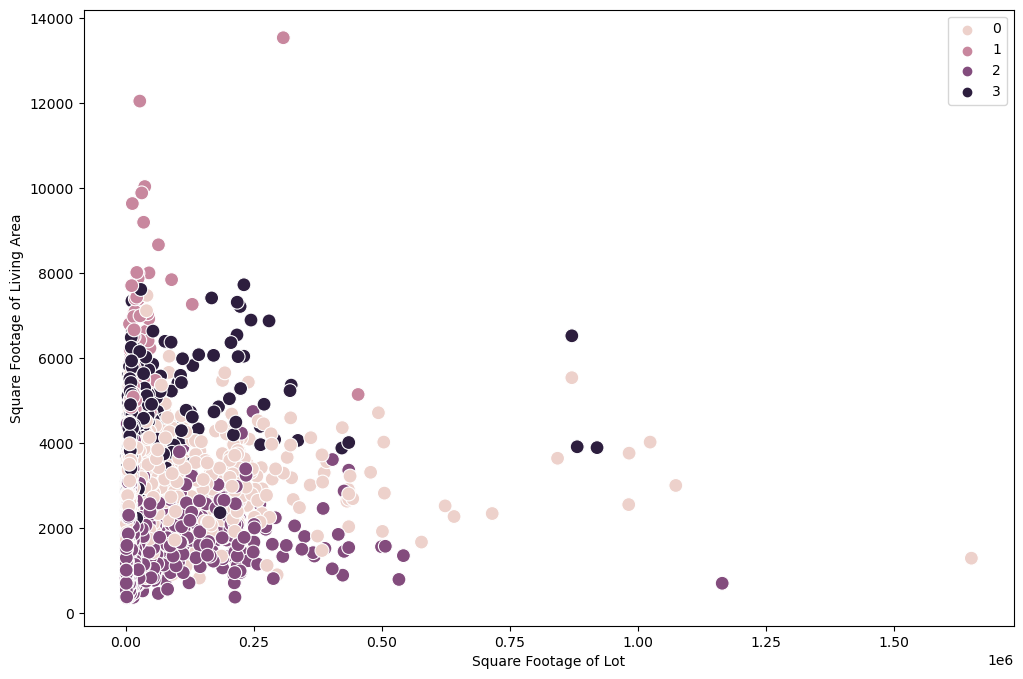

In [156]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['sqft_lot'], y=df2['sqft_living'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Footage of Lot')
plt.ylabel('Square Footage of Living Area')
plt.show()

We can see here that the square footage of a lot and the square footage of the home's living area don't have a very strong relationship. While some clusters are present, this can likely be explained by the square footage of both the home and lot being within the most common range.

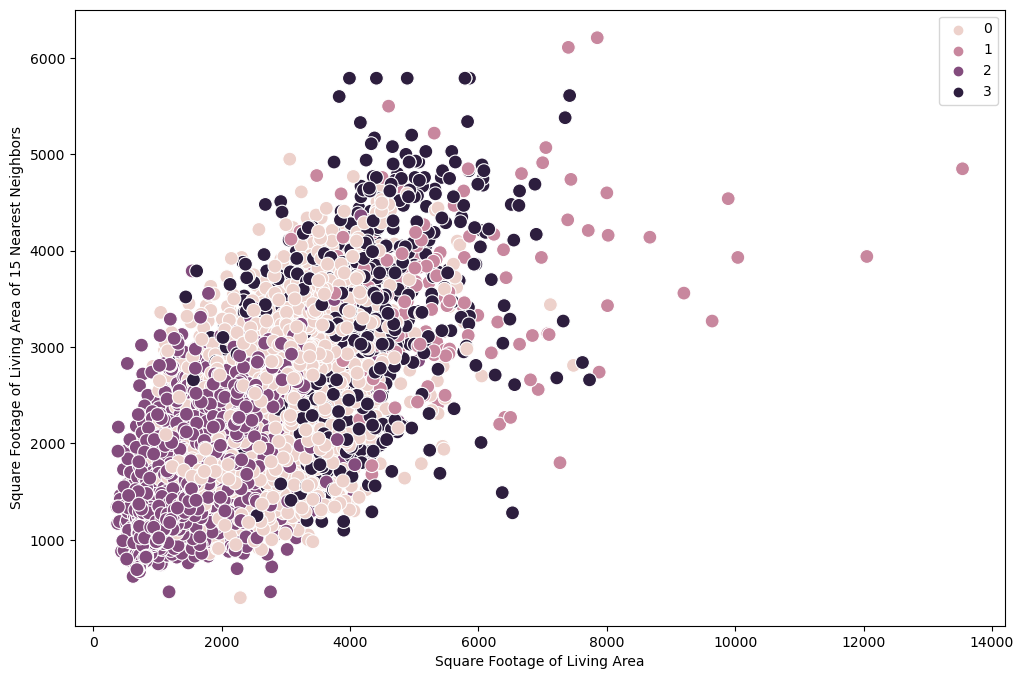

In [162]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['sqft_living'], y=df2['sqft_living15'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Square Footage of Living Area of 15 Nearest Neighbors')
plt.show()

While this shows that there may be some relationship between the size of a home and the average square footage of the nearest 15 neighbors, it is also possible the group 2 only appears to have a shared relationship because that is the typical square footage that most home will fall into.

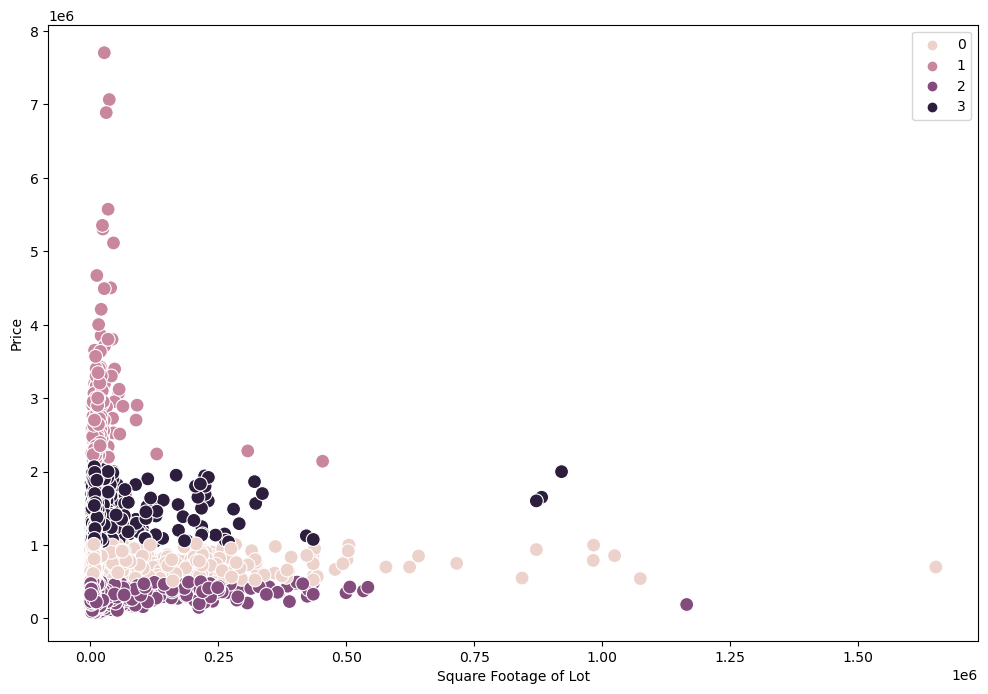

In [174]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['sqft_lot'], y=df2['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Square Footage of Lot')
plt.ylabel('Price')
plt.show()

Here we can see that there does appear to be a relationship between home price and square footage of a lot. This is more easily visualized than with a regression model, but will likely need further examination before any definitive conclusions can be drawn.

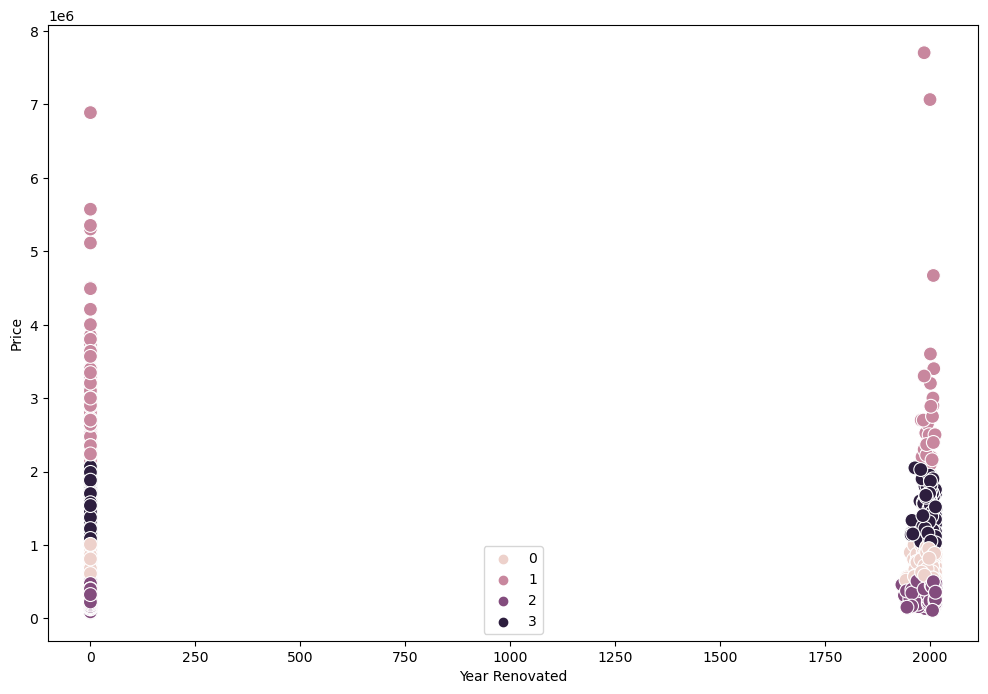

In [180]:
# Plot the clusters for the "sqft_living" and "sqft_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['yr_renovated'], y=df2['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.show()

While renovation year does appear to have some influence on price, this plot will likely be more effective if homes with an entry of 0 are excluded from the analysis, allowing us to more closely examine the relationship between price and homes that have actually been remodeled.

In [184]:
# use loc to group clusters by color then get descriptive statistics

df2.loc[df2['cluster'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['cluster'] == 2, 'cluster'] = 'purple'
df2.loc[df2['cluster'] == 1, 'cluster'] = 'pink'
df2.loc[df2['cluster'] == 0, 'cluster'] = 'light pink'

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_24009/2945484445.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2.loc[df2['cluster'] == 3, 'cluster'] = 'dark purple'


In [190]:
df2.groupby('cluster').agg({'price':['mean', 'median'], 
                         'yr_built':['mean', 'median'], 
                         'sqft_living':['mean', 'median'],
                         'sqft_living15':['mean', 'median'],
                          'sqft_lot':['mean', 'median']})

price                yr_built          sqft_living  \
                     mean     median         mean  median         mean   
cluster                                                                  
dark purple  1.359100e+06  1295000.0  1975.258354  1985.0  3631.536267   
light pink   6.893577e+05   660000.0  1971.460383  1978.0  2456.429516   
pink         2.806109e+06  2528500.0  1972.257895  1986.5  5094.152632   
purple       3.453549e+05   345000.0  1970.321984  1970.0  1677.418711   

                    sqft_living15              sqft_lot           
             median          mean  median          mean   median  
cluster                                                           
dark purple  3530.0   3016.995110  2950.0  23440.362673  10361.0  
light pink   2400.0   2271.246107  2200.0  18997.774425   7465.0  
pink         4730.0   3516.910526  3470.0  23010.052632  15972.0  
purple       1600.0   1706.608373  1630.0  12015.529753   7500.0

The above descriptive statistics show that (particularly when it comes to price and sqft_living), that homes can be clustered primarily based on size and that variation is present. Year built shows little variation. the Price cluster shows that there is significant variation (mean) between the 4 clusters, but looking into the relationships between this and the other variables will be necessary. I believe the next steps could involve assessing how some of the more categorical variables (such as grade, condition, view, waterfront, etc) play a role in home pricing.